In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv('../../../data/miner/df_qtde_ref.csv')
df.head()

,Unnamed: 0,valor_unit,mes,dia_semana,dia,fim_semana,inicio_mes,feriado,quantidade
0,533,2.49,1,2,2,0,1,0,240.0
1,3597,2.35,1,3,3,0,1,0,331.0
2,6540,2.29,1,4,4,0,1,0,310.0
3,9302,2.29,1,5,5,1,1,0,228.0
4,12094,2.29,1,6,6,1,1,0,127.0


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,valor_unit,mes,dia_semana,dia,fim_semana,inicio_mes,feriado,quantidade
0,2.49,1,2,2,0,1,0,240.0
1,2.35,1,3,3,0,1,0,331.0
2,2.29,1,4,4,0,1,0,310.0
3,2.29,1,5,5,1,1,0,228.0
4,2.29,1,6,6,1,1,0,127.0


In [4]:
import mahalanobis as mahala
from importlib import reload
reload(mahala)

<module 'mahalanobis' from '/home/dev/Documentos/Dev.Academy/andromeda/src/quixada/predict/mahalanobis.py'>

In [5]:
df_x = df
df['mahala'] = mahala.calc_mahalanobis_distance(df_x, df)

In [6]:
df.head()

,valor_unit,mes,dia_semana,dia,fim_semana,inicio_mes,feriado,quantidade,mahala
0,2.49,1,2,2,0,1,0,240.0,6.411297
1,2.35,1,3,3,0,1,0,331.0,5.353399
2,2.29,1,4,4,0,1,0,310.0,7.576009
3,2.29,1,5,5,1,1,0,228.0,8.316640
4,2.29,1,6,6,1,1,0,127.0,11.124700


In [7]:
len(df)

407

In [8]:
df_with_outliers = df.drop(['mahala'], axis=1)
df_without_outliers = mahala.removing_outlier_with_mahalanobis_distance(df)

In [9]:
print(len(df_with_outliers), len(df_without_outliers))

407 381


In [10]:
dataframes = {}
dataframes['df_with_outliers']    = df_with_outliers
dataframes['df_without_outliers_using_mahalanobis_distance'] = df_without_outliers

In [11]:
models = {}
models['Linear Regression']     = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=True, normalize=True))])
models['GradientBoosting']      = GradientBoostingRegressor(random_state=0)
models['RandomForestRegressor'] = RandomForestRegressor(random_state=0, n_estimators=100)

In [12]:
rmse_result = []

for df_name, df in dataframes.items():
 
    X = df.drop('quantidade', axis = 1)
    y = df['quantidade'] 
    
    for model_name, model in models.items():
        
        model.fit(X, y)
        y_pred = model.predict(X)
        
        rmse = np.sqrt(mse(y, y_pred))
        rmse_result.append((df_name, model_name, rmse))

In [13]:
pd.DataFrame(rmse_result, 
             columns=['DataSet','Modelo','RMSE']).sort_values(by=['DataSet', 'RMSE'], 
             ascending=[False, True])

,DataSet,Modelo,RMSE
5,df_without_outliers_using_mahalanobis_distance,RandomForestRegressor,26.503855
4,df_without_outliers_using_mahalanobis_distance,GradientBoosting,38.379747
3,df_without_outliers_using_mahalanobis_distance,Linear Regression,57.740736
2,df_with_outliers,RandomForestRegressor,29.845517
1,df_with_outliers,GradientBoosting,50.252917
0,df_with_outliers,Linear Regression,80.002104


## Predict Visualization

In [14]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv('../../../data/miner/df_qtde_ref.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df['mahala'] = mahala.calc_mahalanobis_distance(df, df)
df_without_outliers = mahala.removing_outlier_with_mahalanobis_distance(df)
df_without_outliers = df.drop(['mahala'], axis=1)

In [16]:
X = df_without_outliers.drop('quantidade', axis = 1)
y = df_without_outliers['quantidade'] 

x = df_without_outliers.index

In [17]:
# Training classifiers
reg1 = GradientBoostingRegressor(random_state=0)
reg2 = RandomForestRegressor(random_state=0, n_estimators=100)
reg3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=True, normalize=True))])

In [18]:
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [19]:
xt = X[:50]
yt = y[:50]

In [20]:
plt.rcParams['figure.figsize'] = [12.0 , 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

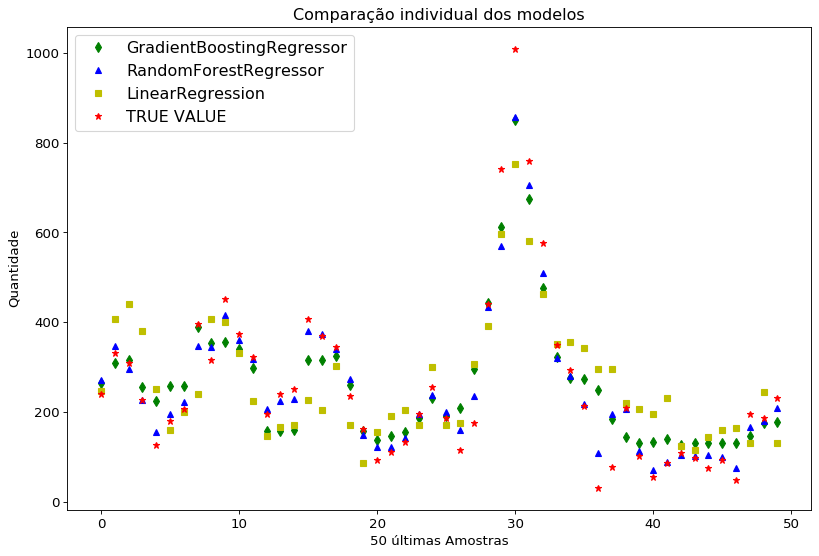

In [21]:
plt.figure()
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(yt, 'r*', label='TRUE VALUE')

plt.ylabel('Quantidade')
plt.xlabel('50 últimas Amostras')
plt.legend(loc="best")
plt.title('Comparação individual dos modelos')
plt.show()

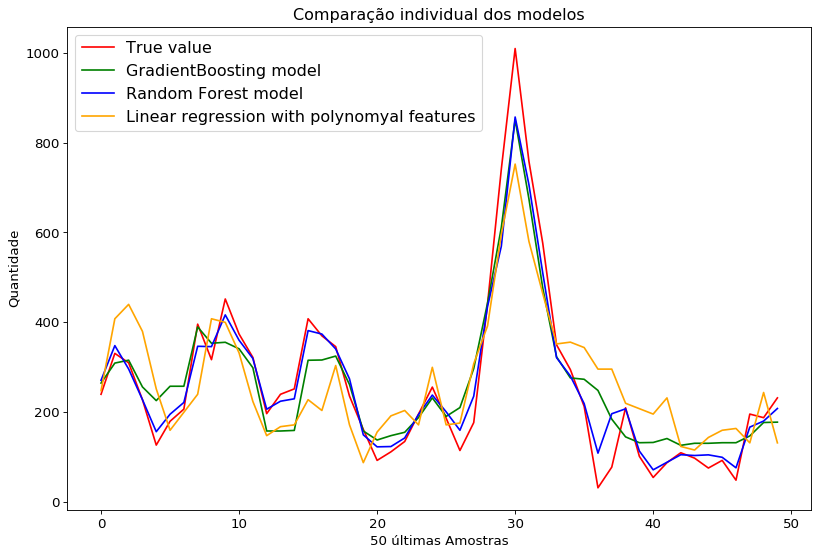

In [22]:
plt.plot(x[:50],y[:50], color='red', label='True value')
plt.plot(x[:50],reg1.predict(xt), color='green', label='GradientBoosting model')
plt.plot(x[:50],reg2.predict(xt), color='blue', label='Random Forest model')
plt.plot(x[:50],reg3.predict(xt), color='orange', label='Linear regression with polynomyal features')

plt.ylabel('Quantidade')
plt.xlabel('50 últimas Amostras')
plt.legend(loc="best")
plt.title('Comparação individual dos modelos')
plt.show()

### Testing another values

In [23]:
np.array(X)

array([[2.49, 1.  , 2.  , ..., 0.  , 1.  , 0.  ],
       [2.35, 1.  , 3.  , ..., 0.  , 1.  , 0.  ],
       [2.29, 1.  , 4.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [2.49, 3.  , 6.  , ..., 1.  , 1.  , 0.  ],
       [2.49, 3.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [2.49, 3.  , 1.  , ..., 0.  , 1.  , 0.  ]])

In [56]:
np.array(y.head(5))

array([240., 331., 310., 228., 127.])

In [120]:
new_sample = np.array(X.head(5))
new_sample[0][0] = new_sample[0][0]*1.04

new_sample[0][0] = new_sample[0][0]*1.04
new_sample[0][0]

2.5896000000000003

In [121]:
new_sample

array([[2.5896, 1.    , 2.    , 2.    , 0.    , 1.    , 0.    ],
       [2.35  , 1.    , 3.    , 3.    , 0.    , 1.    , 0.    ],
       [2.29  , 1.    , 4.    , 4.    , 0.    , 1.    , 0.    ],
       [2.29  , 1.    , 5.    , 5.    , 1.    , 1.    , 0.    ],
       [2.29  , 1.    , 6.    , 6.    , 1.    , 1.    , 0.    ]])

In [122]:
reg1.predict(new_sample)

array([234.2729741 , 309.43511867, 315.90428994, 256.36771497,
       225.97890561])

In [123]:
reg2.predict(new_sample)

array([271.11, 348.26, 296.23, 228.16, 156.84])

In [124]:
reg3.predict(new_sample)

array([152., 408., 440., 380., 252.])

In [29]:
### 